# House Price Predictor using Linear Regression Model

# Import All the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

# Working on Train dataframe

In [2]:
traindf = pd.read_csv('train.csv')

In [3]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
numeric_df = traindf.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [5]:
req_tr = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]

In [6]:
selected_tr = traindf[req_tr]

In [7]:
selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) + 
                                    selected_tr['BsmtHalfBath'].fillna(0) + 
                                    selected_tr['FullBath'].fillna(0) + 
                                    selected_tr['HalfBath'].fillna(0))

selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) + 
                                  selected_tr['1stFlrSF'].fillna(0) + 
                                  selected_tr['2ndFlrSF'].fillna(0) + 
                                  selected_tr['LowQualFinSF'].fillna(0) + 
                                  selected_tr['GrLivArea'].fillna(0))

C:\Users\vaish\AppData\Local\Temp\ipykernel_8580\341052813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
C:\Users\vaish\AppData\Local\Temp\ipykernel_8580\341052813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +


In [8]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4276
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,4492
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4190
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,4247
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,5688
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,5832
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,3234


# Keeping only the necessary columns

In [9]:
train_df = selected_tr[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual','SalePrice']]

In [10]:
train_df

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,8,4,548,4276,7,208500
1,6,3,460,3786,6,181500
2,6,4,608,4492,7,223500
3,7,2,642,4190,7,140000
4,9,4,836,5541,8,250000
...,...,...,...,...,...,...
1455,7,3,460,4247,6,175000
1456,7,3,500,5688,6,210000
1457,9,2,252,5832,7,266500
1458,5,2,240,3234,5,142125


# Splitting the dataset and Creating Pipeline

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(train_df,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 1168
Rows in test set:292



In [12]:
housing = train_set.drop("SalePrice",axis=1)
housing_labels = train_set["SalePrice"].copy()

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [14]:
X_train = my_pipeline.fit_transform(housing)

In [15]:
X_train

array([[-0.96456591, -0.48377079, -0.86383727, -0.13352109, -0.82044456],
       [ 0.27075534,  0.61127627, -0.45626397, -0.13428593, -0.08893368],
       [-1.58222654, -1.57881784, -2.25716927, -1.32207838, -0.82044456],
       ...,
       [-0.96456591, -0.48377079,  0.45366713, -1.16605156, -0.82044456],
       [ 0.27075534, -0.48377079, -1.23349678, -0.26966215,  0.64257719],
       [ 0.27075534, -0.48377079,  0.87071888,  0.28025593,  0.64257719]])

In [16]:
Y_train = housing_labels

In [17]:
Y_train.shape

(1168,)

# Correlations

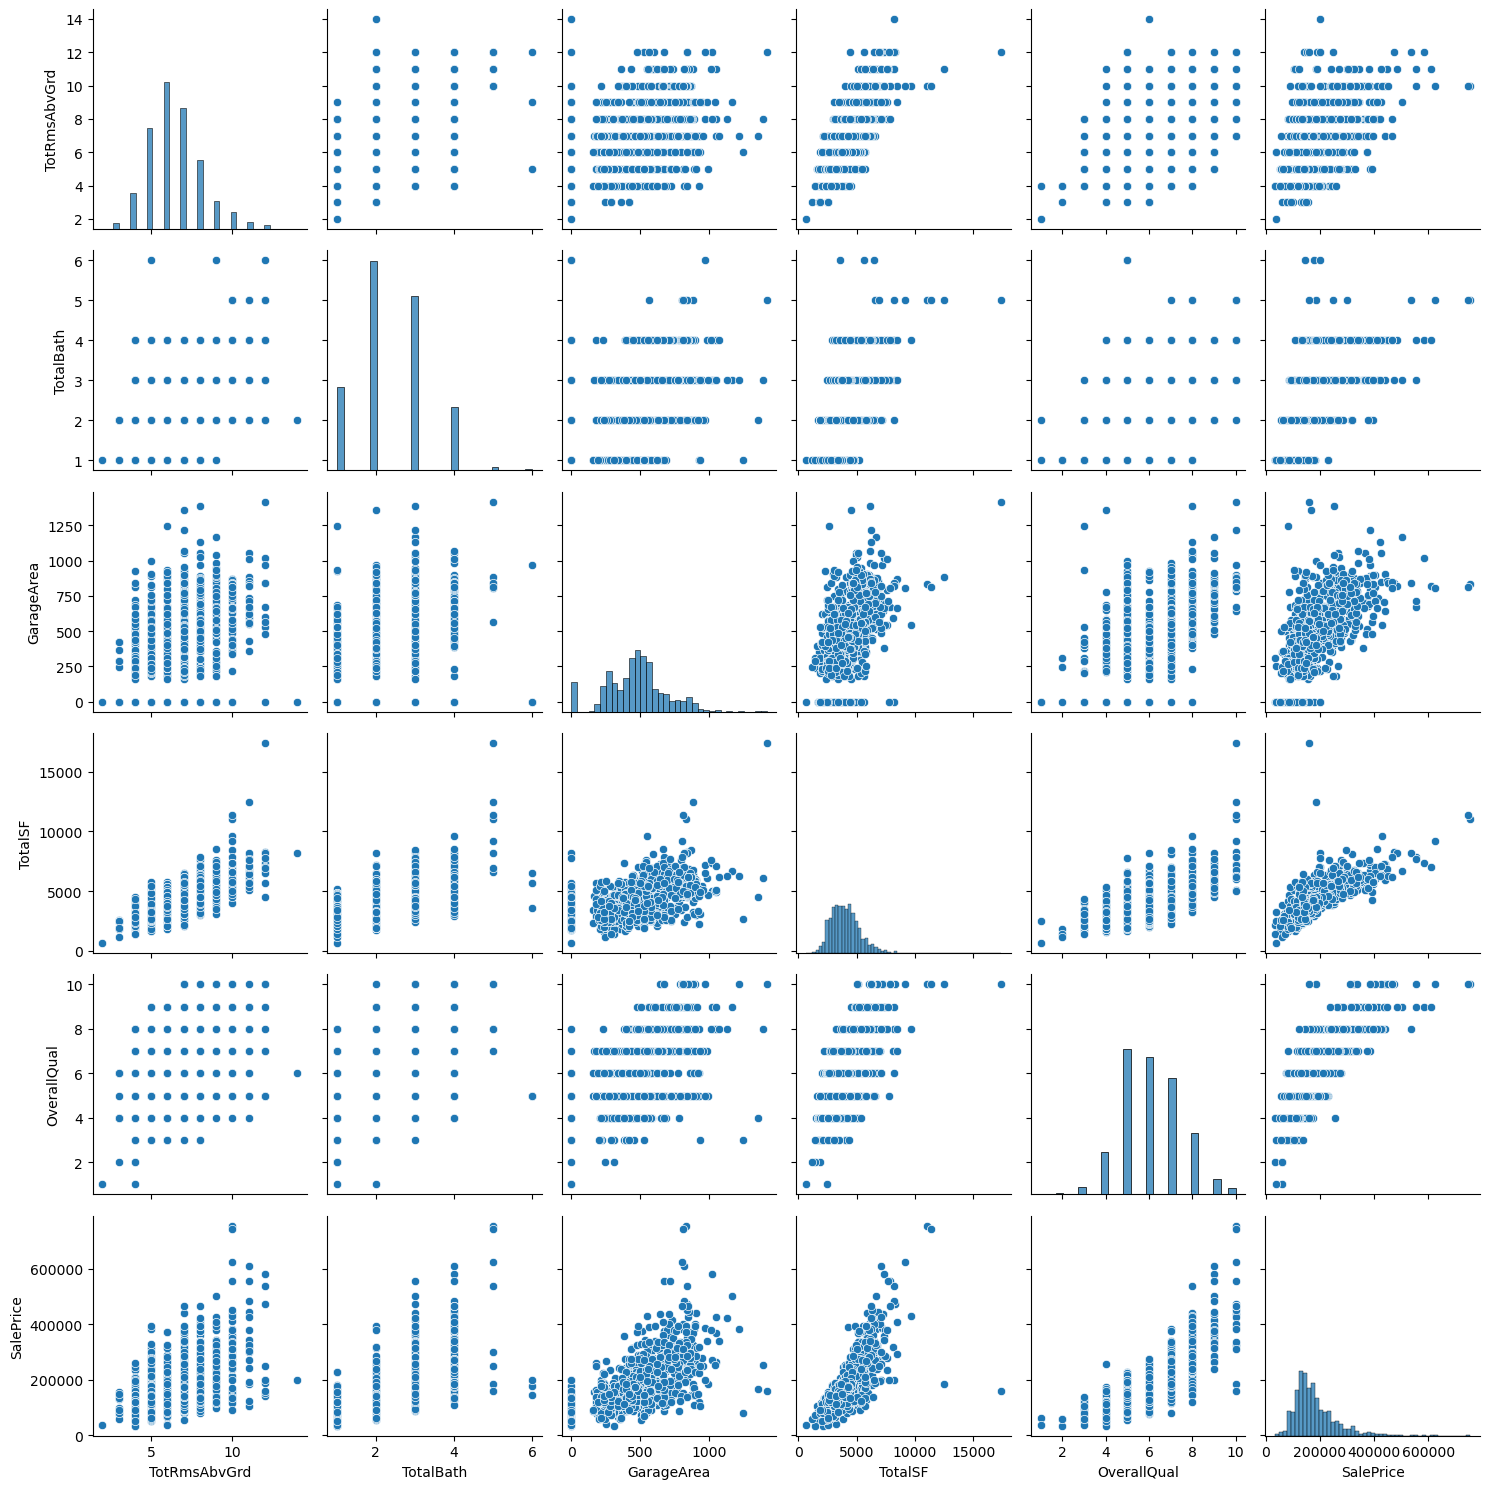

In [18]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [20]:
corr_matrix = train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.773909
GarageArea      0.623431
TotalBath       0.613005
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

<Axes: >

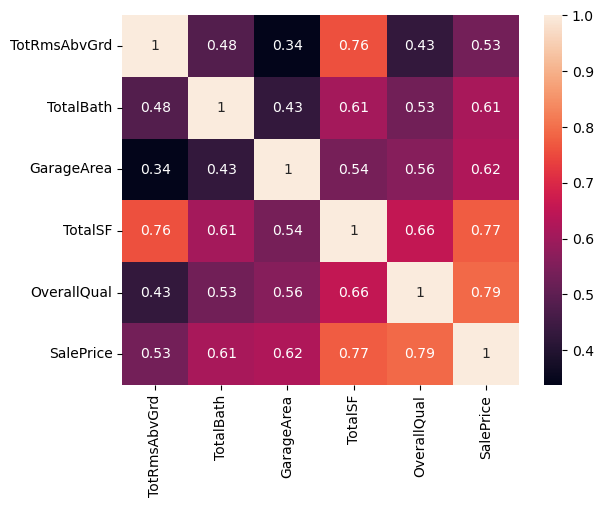

In [21]:
sns.heatmap(train_df.corr(),annot = True)

# Working with Test Dataframe

In [22]:
testdf = pd.read_csv("test.csv")

In [23]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
req_tst = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]

In [25]:
selected_tst = testdf[req_tst]

In [26]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) + 
                                    selected_tst['BsmtHalfBath'].fillna(0) + 
                                    selected_tst['FullBath'].fillna(0) + 
                                    selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) + 
                                  selected_tst['1stFlrSF'].fillna(0) + 
                                  selected_tst['2ndFlrSF'].fillna(0) + 
                                  selected_tst['LowQualFinSF'].fillna(0) + 
                                  selected_tst['GrLivArea'].fillna(0))

C:\Users\vaish\AppData\Local\Temp\ipykernel_8580\771691818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
C:\Users\vaish\AppData\Local\Temp\ipykernel_8580\771691818.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +


In [27]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,1.0,2674.0
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,2.0,3987.0
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,3.0,4186.0
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,3.0,4134.0
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,2.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,2.0,2730.0
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,2.0,2730.0
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,2.0,3672.0
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2.0,2852.0


In [28]:
test_df_unproc = selected_tst[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']]

In [29]:
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,2.0,312.0,3987.0,6
2,6,3.0,482.0,4186.0,5
3,7,3.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,2.0,0.0,2730.0,4
1455,6,2.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,2.0,0.0,2852.0,5


In [30]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())

In [31]:
x_test = my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)

In [32]:
x_test

array([[-0.96456591, -1.57881784,  1.2024646 , -1.10333489, -0.82044456],
       [-0.34690528, -0.48377079, -0.77853123, -0.09910341, -0.08893368],
       [-0.34690528,  0.61127627,  0.02713693,  0.05309923, -0.82044456],
       ...,
       [ 0.27075534, -0.48377079,  0.47262403, -0.34002719, -0.82044456],
       [-0.34690528, -0.48377079, -2.25716927, -0.96719384, -0.82044456],
       [ 1.50607659,  0.61127627,  0.82332664,  0.67261751,  0.64257719]])

# Model Selection

In [33]:
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
y_train_pred = model.predict(X_train)

In [35]:
y_train_pred[:5]

array([147259.34, 171075.  ,  92032.  , 164720.37, 142705.37])

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [37]:
proc_data = my_pipeline.transform(some_data)

In [38]:
model.predict(proc_data)

array([147259.34, 171075.  ,  92032.  , 164720.37, 142705.37])

In [39]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [40]:
train_mse = mean_squared_error(Y_train,y_train_pred)

In [41]:
train_rmse = np.sqrt(train_mse)

In [42]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 186721084.33, Training RMSE: 13664.59
